In [1]:
from quantum_badger import *
import os 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg'] 

from subprocess import call
import pandas as pd

colors = ['#8ECAE6', '#219EBC', '#023047', '#FFCB47', '#FFB703', '#FB8500', '#BB0A21']

from numba import njit

## Initialize the Gaussian Boson Sampling Emulator

In [2]:
# Insert a relative path here (optional)

path = os.getcwd()
path = path.replace("\\" , "/" )

# Set the GBS device parameters

# Number of modes 
m = 8
# Number of input squeezed states
n = round(m/2) 
# Squeezing parameter of the input squeezed vacuum states
r = 1.6

# Number of beam splitters 
n_BS = m**2

r_, phi_ = input_state(r, m, n) 
A = set_input(r_, phi_, path)
U = get_random_interferometer(m, n_BS, path)

# or 
# U = import_interferometer(path, '/matrix_U.dat') 

M = set_device_parameters(r, A, U, path)

# Tests
#check_set_parameters(U,M)

Data were exported to /Users/anastasiacertkova/Desktop/Coding/initial_state.dat
Data were exported to /Users/anastasiacertkova/Desktop/Coding/matrix_U.dat
Data were exported to /Users/anastasiacertkova/Desktop/Coding/GBS_matrix.dat


In [3]:
error = 0.05

ind, phi, psi, eta = import_parameters_interferometer(path, '/parameters_of_interferometer.dat')
U_appr = interferometer_approx(n_BS, ind, phi, psi, eta, error,  m)

print("Frobenius distance between U and U_appr:", round(frobenius_distance(U, U_appr),2) )

Frobenius distance between U and U_appr: 1.0


In [4]:
batch_size = 10 
samples = uniform_sampling_tr(batch_size,n,m)
samples

[[0, 1, 0, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 1, 0, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 1, 1, 0, 0, 0]]

In [5]:
export_samples(samples, path, "/samples.dat")

'Data were exported to /Users/anastasiacertkova/Desktop/Coding/samples.dat'

In [6]:
samples = import_samples(path, "/samples.dat")
samples

[[0, 1, 0, 1, 1, 1, 0, 0],
 [0, 1, 1, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 1, 0, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 1, 1, 0, 0, 0]]

## Run the Gaussian Boson Sampling Emulator

In [7]:
%%bash

stat

0 9954476165685092246 prw-rw---- 0 anastasiacertkova staff 0 0 "May 26 13:12:16 2023" "May 26 13:12:16 2023" "May 26 13:12:16 2023" "Jan  1 01:00:00 1970" 16384 0 0 (stdin)


In [8]:
# cmd = "python3 " path + r"GBS.py" 
# call(cmd.split(" "))

## Compute probabilities exactly

In [9]:
# samples, probabilities = import_gbs_samples(path)

In [10]:
probabilities_exact = []

for s in samples:
    
    probabilities_exact.append(prob_exact(s, M))

In [11]:
for i in range(len(samples)):
    print(samples[i],convert_01_0123(samples[i]), probabilities_exact[i])

[0, 1, 0, 1, 1, 1, 0, 0] [1, 3, 4, 5] 1.0046721976289188e-05
[0, 1, 1, 1, 1, 0, 0, 0] [1, 2, 3, 4] 0.0004527742237597054
[1, 0, 0, 0, 1, 1, 1, 0] [0, 4, 5, 6] 4.631170204677716e-05
[0, 1, 1, 0, 1, 0, 1, 0] [1, 2, 4, 6] 0.0006800953724487449
[0, 0, 0, 1, 1, 0, 1, 1] [3, 4, 6, 7] 0.0009459850227403313
[1, 1, 0, 1, 0, 0, 0, 1] [0, 1, 3, 7] 0.0010397834000600362
[0, 1, 0, 0, 1, 0, 1, 1] [1, 4, 6, 7] 0.0016255117039647474
[0, 1, 1, 0, 1, 0, 1, 0] [1, 2, 4, 6] 0.0006800953724487449
[1, 1, 0, 0, 1, 1, 0, 0] [0, 1, 4, 5] 4.4302012819995286e-05
[1, 0, 1, 1, 1, 0, 0, 0] [0, 2, 3, 4] 0.0007689788290208484


In [12]:
# Obtain all possible samples for theshold detection
all_permutations = threshold_basis_set(m)
# Calculate probabilities for all possible samples 

probabilities_exact = []

for s in all_permutations:
    probabilities_exact.append(prob_exact(s, M))
    

# Sum all probabilities to obtain 1 
print("sum prob:", sum(probabilities_exact))


sum prob: 0.9999999999999973


In [13]:
basis_dictionary = {
        str(all_permutations[i]): [sum(all_permutations[i]), probabilities_exact[i]] 
        for i in range(len(all_permutations))
    }

In [14]:
df_basis = (
    pd.DataFrame
    .from_dict(basis_dictionary, orient='index', columns=["n_clicks","probability_exact"])
)

df_basis.index.name = "sample"


In [15]:
df_basis.info()
df_basis.head()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, [0, 0, 0, 0, 0, 0, 0, 0] to [1, 1, 1, 1, 1, 1, 1, 1]
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   n_clicks           256 non-null    int64  
 1   probability_exact  256 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.0+ KB


,n_clicks,probability_exact
sample,,
"[0, 0, 0, 0, 0, 0, 0, 0]",0,0.022658
"[1, 0, 0, 0, 0, 0, 0, 0]",1,0.001157
"[0, 1, 0, 0, 0, 0, 0, 0]",1,0.000183
"[0, 0, 1, 0, 0, 0, 0, 0]",1,0.001990
"[0, 0, 0, 1, 0, 0, 0, 0]",1,0.000388


In [16]:
# Find probability of a specific sample in DataFrame
sample = [0]*m
df_basis["probability_exact"].loc[str(sample)] 

0.022658400554403643

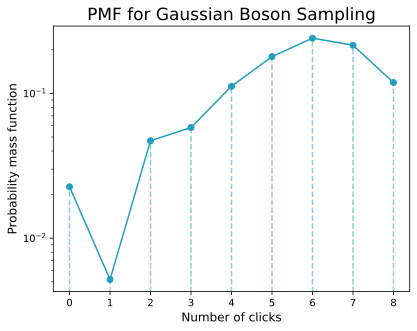

In [17]:
pmf_values = [sum(df_basis["probability_exact"][df_basis["n_clicks"] == n]) for n in range(m+1)]

plt.vlines(
    range(m+1), 
    0,
    pmf_values, 
    color = colors[0],
    linestyles='dashed'
)

plt.plot(
    range(m+1), 
    pmf_values,
    'o-',
    color = colors[1]
)

plt.yscale('log')
plt.xlabel("Number of clicks", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title("PMF for Gaussian Boson Sampling", fontsize=17);
plt.show()

In [18]:
# Alignment 
# Create column "samples_frequency"
# Values should contain the frequencies of imported samples 

#df_basis["probability_exact"].loc[str(samples[0])]

In [19]:
# Test: comparison exact probabilities with sf for the small problem

In [20]:
# Compute probabilities for sectors exactly

def prob_sectors_exact(M, sample=[1]*len(M), nu_max=10*len(M)):
    
    """
    Calculates the exact probabilities over sectors for a given sample 
    and Gaussian matrix.

    Args:
        M (numpy.ndarray): The Gaussian matrix for computation.
        sample (list, optional): The sample to calculate the probabilities for. Defaults to [1]*len(M).
        nu_max (int, optional): The maximum value for the parameter 'nu'. Defaults to 10*len(M).

    Returns:
        numpy.ndarray: The exact probabilities over sectors for the given sample and Gaussian matrix.

        
    """
 
    
    clicked_detectors = convert_01_0123(sample)    
    M_sub = red_mat(M, clicked_detectors)

    dnu = 2 * np.pi / nu_max
    m = len(M_sub)

    stat = np.zeros((m + 1, nu_max), dtype=np.complex128)
    sectors = np.zeros((m + 1, nu_max), dtype=np.float64)
                    
    for i in range(m+1):
        detect_event = [1 for j in range(i)] + [0]*(m-i) 
        permutations = list(permut(detect_event))

        if i == 0:
            for nu in range(nu_max):
                stat[i,nu] += 1

        else:
            for nu in range(nu_max):
                for s in permutations:
                    stat[i,nu] += Z_i(s, M_sub, nu=nu*dnu) 
                    
    for k in range(m):
        for h in range(k + 1, m + 1):
            for nu in range(nu_max):
                stat[h, nu] -= stat[k, nu] * number_of_comb(m - k, m - h)

    for n in range(m + 1):
        for j in range(nu_max):
            for k in range(nu_max):
                sectors[n, j] += (stat[n, k]*np.exp(-1j*j*k*dnu)/nu_max).real
                
    return sectors/Z(M)

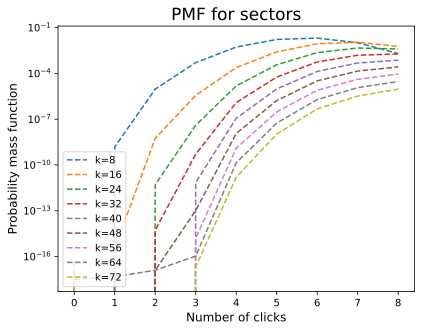

In [21]:
nu_max =  m*10

P_sectors = prob_sectors_exact(M,sample=[1]*m, nu_max=nu_max)

for nu in range(m,m*10,m):
    plt.plot(
        range(m+1),
        [P_sectors[j,nu] for j in range(m+1)],
        '--' ,
        label = 'k='+str(nu)
)
plt.yscale('log')
plt.legend(prop={'size':10}, loc='lower left')
plt.xlabel("Number of clicks", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title("PMF for sectors", fontsize=17);
plt.show()

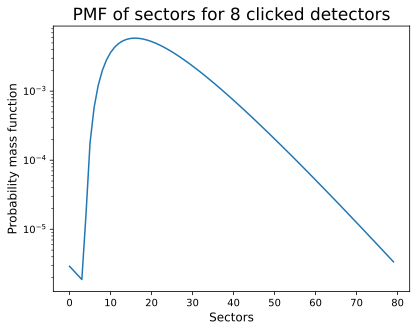

In [22]:
n_clicked = m
plt.plot(
        range(nu_max),
        [P_sectors[n_clicked,nu] for nu in range(nu_max)],
        '-' 
)
plt.yscale('log')
#plt.legend(prop={'size':10}, loc='lower left')
plt.xlabel("Sectors", fontsize=12)
plt.ylabel("Probability mass function", fontsize=12)
plt.title(f"PMF of sectors for {n_clicked} clicked detectors", fontsize=17);
plt.show()

In [23]:
# Comparison for  
nu_max = 10*m
list_det = [1]*3 +[0]*(m-3)


P_sectors =  prob_sectors_exact(M,sample=list_det,nu_max=nu_max)

P_ = 0
for nu in range(nu_max):
    P_ += P_sectors[sum(list_det),nu]
    
print(P_, df_basis["probability_exact"].loc[str(list_det)])

0.0005718208960343172 0.0005718208960343161
